# Wikipedia data extraction: Spotify streaming records

Use requests and beautiful soup to download and parse spotify streaming records from Wikipedia.

## 1. Notebook set-up

In [1]:
# Standard libraries
import sqlite3
from pathlib import Path

# External libraries 
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

from helper_functions import extract_table_data

In [2]:
# Target URL
url = 'https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records'

# Web browser-like request headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36' +
        '(KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Accept-Encoding': 'gzip, deflate',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
}

## 2. Download HTML

In [ ]:
# Use requests to download the webpage from the target url


## 3. Transform the HTML

### 3.1. Get the table rows

In [ ]:
# Use beautifulsoup to extract the table rows from the html


### 3.2. Get the column names

In [ ]:
# Use beautifulsoup to extract the column headers from the html


Column names: ['Rank', 'Song', 'Artist(s)', 'Streams(billions)', 'Release date', 'Ref.']



### 3.3. Get the data from the table body

In [ ]:
# Use beautifulsoup to extract the table body


### 3.4. Convert to Pandas DataFrame

In [ ]:
# Create a Pandas dataframe from the table body and column names


,Rank,Song,Artist(s),Streams(billions),Release date,Ref.
0,1,Blinding Lights,The Weeknd,4.961,29 November 2019,[2]
1,2,Shape of You,Ed Sheeran,4.490,6 January 2017,[3]
2,3,Starboy,The Weeknd and Daft Punk,4.024,21 September 2016,[4]
3,4,Someone You Loved,Lewis Capaldi,4.002,8 November 2018,[5]
4,5,As It Was,Harry Styles,3.992,1 April 2022,[6]


## 4. Process the DataFrame

### 4.1. Remove unnecessary columns

In [ ]:
# Drop the Ref. columns - we could parse the references at the end of the page 
# and fill in the source, but that information is not needed to complete the 
# assignment


,Rank,Song,Artist(s),Streams(billions),Release date
0,1,Blinding Lights,The Weeknd,4.961,29 November 2019
1,2,Shape of You,Ed Sheeran,4.490,6 January 2017
2,3,Starboy,The Weeknd and Daft Punk,4.024,21 September 2016
3,4,Someone You Loved,Lewis Capaldi,4.002,8 November 2018
4,5,As It Was,Harry Styles,3.992,1 April 2022


### 4.2. Set column data types

In [ ]:
# Set correct data types for number and string columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rank               100 non-null    float64       
 1   Song               100 non-null    string        
 2   Artist(s)          100 non-null    string        
 3   Streams(billions)  100 non-null    float64       
 4   Release date       100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), string(2)
memory usage: 4.1 KB


## 5. Store the data in SQLite

In [10]:
# Create a data directory, if it doesn't exist
Path('../data').mkdir(exist_ok=True, parents=True)

# Create and connect to SQLite database
conn = sqlite3.connect('../data/spotify.db')

# Create a table and insert the top songs DataFrame
results_df.to_sql('top_songs', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

## 6. Visualize the data

### 6.1. Stream count distribution

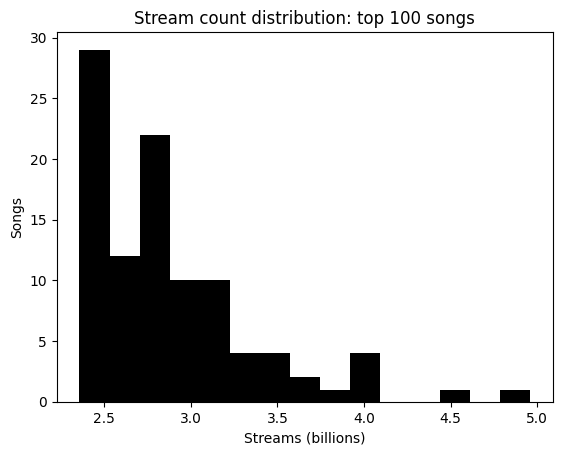

In [ ]:
# Plot the distribution of stream counts with matplotlib's hist

This histogram shows how the top 100 songs are distributed by their total number of streams (in billions). It helps visualize whether most songs have similar stream counts or if a few songs dominate the streaming numbers.

**Observations:**
- The distribution is right-skewed, with most songs clustered at lower stream counts.
- Only a handful of songs have exceptionally high stream numbers, indicating a few outliers dominate the top of the chart.

### 6.2. Other

Come up with a few other data visualizations of your choice to explore and interpret the data.